# Understanding EU wide trends of home office

In [1]:
import pandas as pd
import numpy as np

In [24]:
com_all = pd.read_csv("/Users/nazd/Desktop/nf_bootcamp/Who_Loses_project/granular_commuting_data_clean_wna.csv")

In [25]:
com_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               8750 non-null   object 
 1   0                    3042 non-null   float64
 2   1-9                  4194 non-null   float64
 3   10-14                4372 non-null   float64
 4   15-19                4371 non-null   float64
 5   20-29                4566 non-null   float64
 6   30-44                4568 non-null   float64
 7   45-59                3363 non-null   float64
 8   60+                  3629 non-null   float64
 9   No_response          2411 non-null   float64
 10  sheet_name           8750 non-null   object 
 11  education_level      8750 non-null   object 
 12  urbanisation_degree  8750 non-null   object 
 13  age_class            8750 non-null   object 
 14  sex                  8750 non-null   object 
dtypes: float64(9), object(6)
memory usage:

In [26]:
com_all['Region'].unique()

array(['European_Union_27_countries_from_2020',
       'European_Union_29_countries_from_2013-2020',
       'Euro_area_19_countries_2015-2022', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece',
       'Spain', 'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia',
       'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Iceland', 'Norway', 'Switzerland',
       'United Kingdom', 'Türkiye'], dtype=object)

In [27]:
com_all['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [28]:
com_all['age_class'].unique()

array(['15-34', '15-74', '20-64', '35-49', '50-74'], dtype=object)

In [29]:
com_all['education_level'].unique()

array(['All ISCED 2011 levels', 'ISCED 0–2', 'ISCED 3–4', 'ISCED 5–8',
       'No response'], dtype=object)

In [30]:
com_all['urbanisation_degree'].unique()

array(['Total', 'Cities', 'Towns and suburbs', 'Rural areas',
       'No response'], dtype=object)

# Removing the cluster

To focus solely on difference between countries and EU average, we will drop all specific dimensions such as age group, number of children and so on to only get values of 'total'.

That means
- gender = will be left divided
- urbanisation degree = Total
- edu level = All ISCED 2011 levels
- age = 15-74


In [31]:
total_urbanisation_df = com_all[com_all['urbanisation_degree'] == 'Total'].copy()

total_urbanisation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1750 entries, 0 to 5249
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               1750 non-null   object 
 1   0                    1023 non-null   float64
 2   1-9                  1254 non-null   float64
 3   10-14                1288 non-null   float64
 4   15-19                1276 non-null   float64
 5   20-29                1302 non-null   float64
 6   30-44                1308 non-null   float64
 7   45-59                1088 non-null   float64
 8   60+                  1144 non-null   float64
 9   No_response          791 non-null    float64
 10  sheet_name           1750 non-null   object 
 11  education_level      1750 non-null   object 
 12  urbanisation_degree  1750 non-null   object 
 13  age_class            1750 non-null   object 
 14  sex                  1750 non-null   object 
dtypes: float64(9), object(6)
memory usage: 218.

In [32]:
total_urbanisation_edu_df = total_urbanisation_df[total_urbanisation_df['education_level'] == 'All ISCED 2011 levels'].copy()

total_urbanisation_edu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 4549
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               350 non-null    object 
 1   0                    315 non-null    float64
 2   1-9                  343 non-null    float64
 3   10-14                346 non-null    float64
 4   15-19                345 non-null    float64
 5   20-29                346 non-null    float64
 6   30-44                344 non-null    float64
 7   45-59                327 non-null    float64
 8   60+                  329 non-null    float64
 9   No_response          240 non-null    float64
 10  sheet_name           350 non-null    object 
 11  education_level      350 non-null    object 
 12  urbanisation_degree  350 non-null    object 
 13  age_class            350 non-null    object 
 14  sex                  350 non-null    object 
dtypes: float64(9), object(6)
memory usage: 43.8+

In [33]:
total_urbanisation_edu_age_df = total_urbanisation_edu_df[total_urbanisation_edu_df['age_class'] == '15-74'].copy()

total_urbanisation_edu_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 35 to 4444
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               70 non-null     object 
 1   0                    68 non-null     float64
 2   1-9                  70 non-null     float64
 3   10-14                70 non-null     float64
 4   15-19                70 non-null     float64
 5   20-29                70 non-null     float64
 6   30-44                70 non-null     float64
 7   45-59                68 non-null     float64
 8   60+                  68 non-null     float64
 9   No_response          53 non-null     float64
 10  sheet_name           70 non-null     object 
 11  education_level      70 non-null     object 
 12  urbanisation_degree  70 non-null     object 
 13  age_class            70 non-null     object 
 14  sex                  70 non-null     object 
dtypes: float64(9), object(6)
memory usage: 8.8+ 

In [34]:
total_urbanisation_edu_age_df = total_urbanisation_edu_age_df.drop(columns=['No_response', 'sheet_name'])

In [35]:
general_country_com = total_urbanisation_edu_age_df.copy()

In [36]:
general_country_com.reset_index(drop=True, inplace=True)

In [37]:
general_country_com.head(40)

,Region,0,1-9,10-14,15-19,20-29,30-44,45-59,60+,education_level,urbanisation_degree,age_class,sex
0,European_Union_27_countries_from_2020,39269.0,129257.0,141673.0,129307.0,166192.0,170659.0,48578.0,60876.0,All ISCED 2011 levels,Total,15-74,Female
1,European_Union_29_countries_from_2013-2020,50933.0,14917.0,163406.0,147403.0,193131.0,198739.0,58598.0,76187.0,All ISCED 2011 levels,Total,15-74,Female
2,Euro_area_19_countries_2015-2022,30392.0,107917.0,111803.0,97262.0,123329.0,121851.0,36911.0,48602.0,All ISCED 2011 levels,Total,15-74,Female
3,Belgium,1607.0,2508.0,3125.0,3053.0,4344.0,4391.0,1616.0,1909.0,All ISCED 2011 levels,Total,15-74,Female
4,Bulgaria,214.0,577.0,2219.0,2652.0,3568.0,4132.0,888.0,623.0,All ISCED 2011 levels,Total,15-74,Female
5,Czechia,1156.0,2043.0,3609.0,3663.0,4735.0,5232.0,1532.0,1346.0,All ISCED 2011 levels,Total,15-74,Female
6,Denmark,632.0,1683.0,1844.0,1939.0,2672.0,262.0,967.0,791.0,All ISCED 2011 levels,Total,15-74,Female
7,Germany,7849.0,27575.0,29624.0,26604.0,3477.0,3549.0,10432.0,12631.0,All ISCED 2011 levels,Total,15-74,Female
8,Estonia,141.0,426.0,55.0,542.0,624.0,631.0,145.0,164.0,All ISCED 2011 levels,Total,15-74,Female
9,Ireland,512.0,1222.0,1305.0,1163.0,1837.0,1829.0,575.0,88.0,All ISCED 2011 levels,Total,15-74,Female


In [23]:
general_country_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               70 non-null     object 
 1   0                    68 non-null     float64
 2   1+                   70 non-null     float64
 3   30+                  70 non-null     float64
 4   60+                  68 non-null     float64
 5   education_level      70 non-null     object 
 6   urbanisation_degree  70 non-null     object 
 7   age_class            70 non-null     object 
 8   sex                  70 non-null     object 
dtypes: float64(4), object(5)
memory usage: 5.1+ KB


In [ ]:
# show rows with equal or more than 1 na values

rows_with_over3_na = general_country_com[general_country_com.isnull().sum(axis=1) >= 1]

rows_with_over3_na.head()


,Region,0,1-9,10-14,15-19,20-29,30-44,45-59,60+,education_level,urbanisation_degree,age_class,sex
15,Cyprus,179.0,298.0,382.0,369.0,416.0,231.0,61.0,NaN,All ISCED 2011 levels,Total,15-74,Female
30,Iceland,NaN,344.0,165.0,115.0,102.0,69.0,NaN,NaN,All ISCED 2011 levels,Total,15-74,Female
65,Iceland,NaN,395.0,163.0,161.0,103.0,83.0,NaN,37.0,All ISCED 2011 levels,Total,15-74,Male


In [49]:
general_country_com.head(40)

,Region,0,1-9,10-14,15-19,20-29,30-44,45-59,60+,education_level,urbanisation_degree,age_class,sex
0,European_Union_27_countries_from_2020,39269.0,129257.0,141673.0,129307.0,166192.0,170659.0,48578.0,60876.0,All ISCED 2011 levels,Total,15-74,Female
1,European_Union_29_countries_from_2013-2020,50933.0,14917.0,163406.0,147403.0,193131.0,198739.0,58598.0,76187.0,All ISCED 2011 levels,Total,15-74,Female
2,Euro_area_19_countries_2015-2022,30392.0,107917.0,111803.0,97262.0,123329.0,121851.0,36911.0,48602.0,All ISCED 2011 levels,Total,15-74,Female
3,Belgium,1607.0,2508.0,3125.0,3053.0,4344.0,4391.0,1616.0,1909.0,All ISCED 2011 levels,Total,15-74,Female
4,Bulgaria,214.0,577.0,2219.0,2652.0,3568.0,4132.0,888.0,623.0,All ISCED 2011 levels,Total,15-74,Female
5,Czechia,1156.0,2043.0,3609.0,3663.0,4735.0,5232.0,1532.0,1346.0,All ISCED 2011 levels,Total,15-74,Female
6,Denmark,632.0,1683.0,1844.0,1939.0,2672.0,262.0,967.0,791.0,All ISCED 2011 levels,Total,15-74,Female
7,Germany,7849.0,27575.0,29624.0,26604.0,3477.0,3549.0,10432.0,12631.0,All ISCED 2011 levels,Total,15-74,Female
8,Estonia,141.0,426.0,55.0,542.0,624.0,631.0,145.0,164.0,All ISCED 2011 levels,Total,15-74,Female
9,Ireland,512.0,1222.0,1305.0,1163.0,1837.0,1829.0,575.0,88.0,All ISCED 2011 levels,Total,15-74,Female


In [55]:
# Define the columns that represent age groups and their values
age_value_columns = ['0', '1-9', '10-14', '15-19', '20-29', '30-44', '45-59', '60+']

# Define the identifier columns that should remain fixed
id_columns = ['Region', 'education_level', 'urbanisation_degree', 'age_class', 'sex']

# Melt the DataFrame to turn age columns into rows
df_melted = general_country_com.melt(id_vars=id_columns,
                     value_vars=age_value_columns,
                     var_name='commuting_time',
                     value_name='value')

# Group by all identifier columns *except* 'sex' and calculate the mean
average_per_country_no_gender = df_melted.groupby(
    ['Region', 'education_level', 'urbanisation_degree', 'age_class', 'commuting_time']
)['value'].mean().reset_index()


In [56]:
average_per_country_no_gender.head()

,Region,education_level,urbanisation_degree,age_class,commuting_time,value
0,Austria,All ISCED 2011 levels,Total,15-74,0,921.0
1,Austria,All ISCED 2011 levels,Total,15-74,1-9,4002.5
2,Austria,All ISCED 2011 levels,Total,15-74,10-14,2925.5
3,Austria,All ISCED 2011 levels,Total,15-74,15-19,2747.5
4,Austria,All ISCED 2011 levels,Total,15-74,20-29,3708.0


In [57]:
average_per_country_no_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               280 non-null    object 
 1   education_level      280 non-null    object 
 2   urbanisation_degree  280 non-null    object 
 3   age_class            280 non-null    object 
 4   commuting_time       280 non-null    object 
 5   value                278 non-null    float64
dtypes: float64(1), object(5)
memory usage: 13.3+ KB


In [58]:
rows_with_na = average_per_country_no_gender[average_per_country_no_gender.isnull().sum(axis=1) >= 1]

rows_with_na.head()

,Region,education_level,urbanisation_degree,age_class,commuting_time,value
128,Iceland,All ISCED 2011 levels,Total,15-74,0,NaN
134,Iceland,All ISCED 2011 levels,Total,15-74,45-59,NaN


In [59]:
average_per_country_no_gender.dropna(inplace=True)

In [60]:
average_per_country_no_gender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 279
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               278 non-null    object 
 1   education_level      278 non-null    object 
 2   urbanisation_degree  278 non-null    object 
 3   age_class            278 non-null    object 
 4   commuting_time       278 non-null    object 
 5   value                278 non-null    float64
dtypes: float64(1), object(5)
memory usage: 15.2+ KB


In [61]:
clean_commuting_df = average_per_country_no_gender.copy()

# Noting that 3 countries below have null values that we are unable to fill!

# What has been done

- data transformed to long format
- limited my dataset to only rows that have no diferentiation per demographic (totals only)
- emoved gender by calulating averages
- NA values were dropped (Iceland with commuting time 0 and 45-59)

# Data exploration

Here we will

- Key statistics
- Visualize overall EU trends
- Visualize overall per country trend
- Identify distribution
- Find outlier countries
- Rank countries

In [62]:
clean_commuting_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 279
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               278 non-null    object 
 1   education_level      278 non-null    object 
 2   urbanisation_degree  278 non-null    object 
 3   age_class            278 non-null    object 
 4   commuting_time       278 non-null    object 
 5   value                278 non-null    float64
dtypes: float64(1), object(5)
memory usage: 15.2+ KB


In [70]:
clean_commuting_df.head(20)

,Region,education_level,urbanisation_degree,age_class,commuting_time,value
0,Austria,All ISCED 2011 levels,Total,15-74,0,921.0
1,Austria,All ISCED 2011 levels,Total,15-74,1-9,4002.5
2,Austria,All ISCED 2011 levels,Total,15-74,10-14,2925.5
3,Austria,All ISCED 2011 levels,Total,15-74,15-19,2747.5
4,Austria,All ISCED 2011 levels,Total,15-74,20-29,3708.0
5,Austria,All ISCED 2011 levels,Total,15-74,30-44,4195.0
6,Austria,All ISCED 2011 levels,Total,15-74,45-59,1607.0
7,Austria,All ISCED 2011 levels,Total,15-74,60+,1597.0
8,Belgium,All ISCED 2011 levels,Total,15-74,0,1917.5
9,Belgium,All ISCED 2011 levels,Total,15-74,1-9,2405.5


In [64]:
clean_commuting_df['Region'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Euro_area_19_countries_2015-2022',
       'European_Union_27_countries_from_2020',
       'European_Union_29_countries_from_2013-2020', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Kingdom'],
      dtype=object)

# Exploring EU averages

In [73]:
commuting_EU_long = clean_commuting_df[clean_commuting_df['Region'] == 'European_Union_27_countries_from_2020']

commuting_EU_long.head(10)

,Region,education_level,urbanisation_degree,age_class,commuting_time,value
72,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,0,41075.0
73,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,1-9,131187.0
74,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,10-14,140995.0
75,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,15-19,133421.5
76,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,20-29,177208.5
77,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,30-44,193171.5
78,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,45-59,56817.0
79,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,60+,76986.0


In [87]:
only_commuters_df = commuting_EU_long[commuting_EU_long['commuting_time'] != '0']
EU_commuters = only_commuters_df['value'].sum()

only_commuters_df.head(10)

,Region,education_level,urbanisation_degree,age_class,commuting_time,value
73,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,1-9,131187.0
74,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,10-14,140995.0
75,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,15-19,133421.5
76,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,20-29,177208.5
77,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,30-44,193171.5
78,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,45-59,56817.0
79,European_Union_27_countries_from_2020,All ISCED 2011 levels,Total,15-74,60+,76986.0


In [83]:
print(f'in 2019, there were {EU_commuters/1000} million commuters across EU')

in 2019, there were 909.7865 million commuters across EU


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

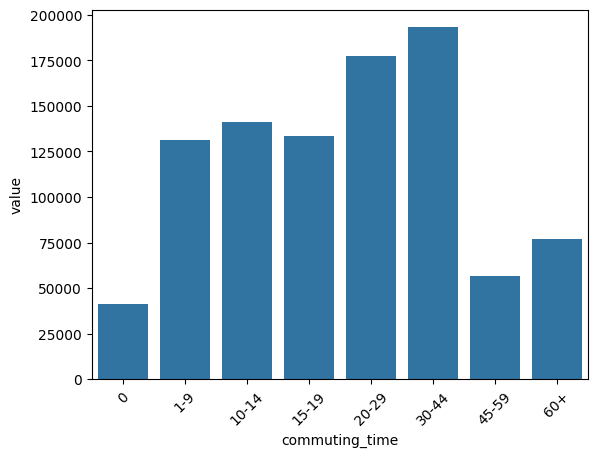

In [86]:
sns.barplot(
    data=commuting_EU_long,
    x='commuting_time',
    y='value'
)
plt.xticks(rotation=45)
plt.show()

# Commuting time per EU country

In [65]:
commuting_countries_long = clean_commuting_df[~clean_commuting_df['Region'].isin(['Euro_area_19_countries_2015-2022', 'European_Union_27_countries_from_2020','European_Union_29_countries_from_2013-2020'])]

In [66]:
commuting_countries_long['Region'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Türkiye', 'United Kingdom'], dtype=object)

In [88]:
commuting_countries_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 0 to 279
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               254 non-null    object 
 1   education_level      254 non-null    object 
 2   urbanisation_degree  254 non-null    object 
 3   age_class            254 non-null    object 
 4   commuting_time       254 non-null    object 
 5   value                254 non-null    float64
dtypes: float64(1), object(5)
memory usage: 13.9+ KB


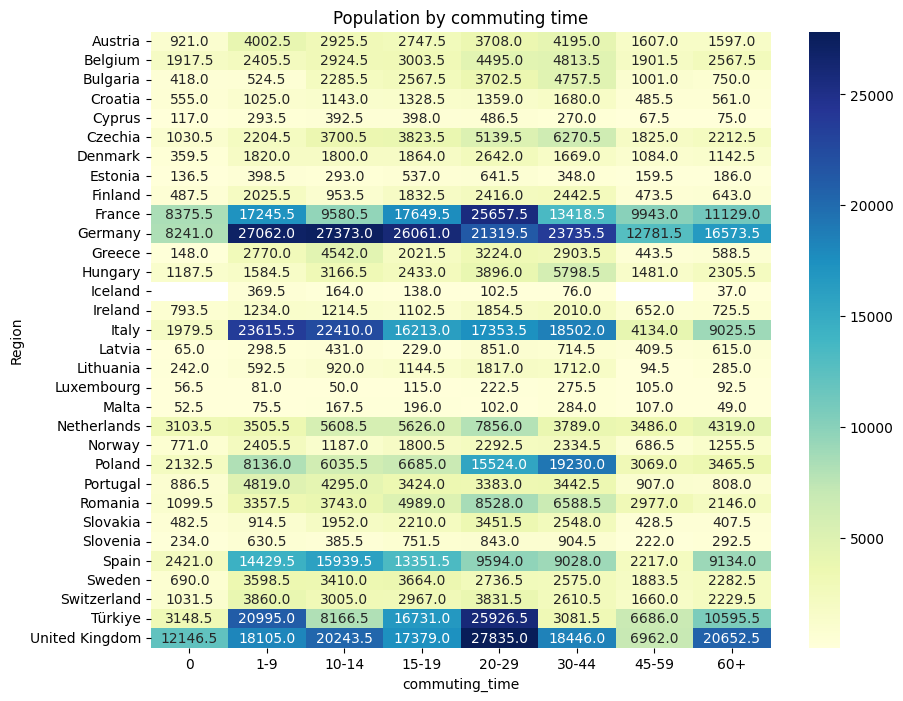

In [91]:
pivot = commuting_countries_long.pivot_table(
    index='Region',
    columns='commuting_time',
    values='value'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Population by commuting time")
plt.show()

In [94]:
commuting_countries_long.groupby(['Region', 'commuting_time'])['value'].sum().sort_values(ascending=False)


Region          commuting_time
United Kingdom  20-29             27835.0
Germany         10-14             27373.0
                1-9               27062.0
                15-19             26061.0
Türkiye         20-29             25926.5
                                   ...   
Luxembourg      0                    56.5
Malta           0                    52.5
Luxembourg      10-14                50.0
Malta           60+                  49.0
Iceland         60+                  37.0
Name: value, Length: 254, dtype: float64

In [96]:
# adding the percetange for better heatmap

commuting_countries_long['percent'] = commuting_countries_long.groupby('Region')['value'] \
    .transform(lambda x: 100 * x / x.sum())

/var/folders/gt/qx94m45d4t1_dn0smm6xb0p40000gn/T/ipykernel_19782/2724114605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commuting_countries_long['percent'] = commuting_countries_long.groupby('Region')['value'] \


In [ ]:

# testing if above worked correctly

a = commuting_countries_long[commuting_countries_long['Region'] == 'Belgium']

a['percent'].sum()

np.float64(100.0)

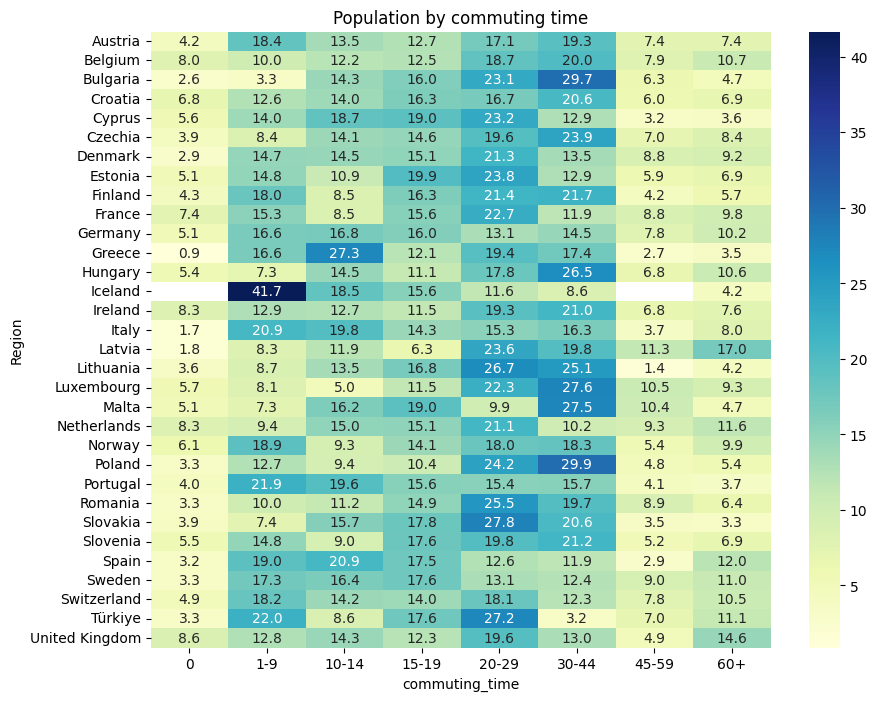

In [104]:
pivot2 = commuting_countries_long.pivot_table(
    index='Region',
    columns='commuting_time',
    values='percent'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot2, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Population by commuting time")
plt.show()

# Clustering

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [138]:
commuting_countries_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 0 to 279
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               254 non-null    object 
 1   education_level      254 non-null    object 
 2   urbanisation_degree  254 non-null    object 
 3   age_class            254 non-null    object 
 4   commuting_time       254 non-null    object 
 5   value                254 non-null    float64
 6   percent              254 non-null    float64
dtypes: float64(2), object(5)
memory usage: 15.9+ KB


In [163]:
df_subset = commuting_countries_long[['Region', 'commuting_time', 'percent']]

pivot_percent = df_subset.pivot(index='Region', columns='commuting_time', values='percent')

pivot_percent = pivot_percent.fillna(0)





In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_percent)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pivot_percent['cluster'] = kmeans.fit_predict(X_scaled)

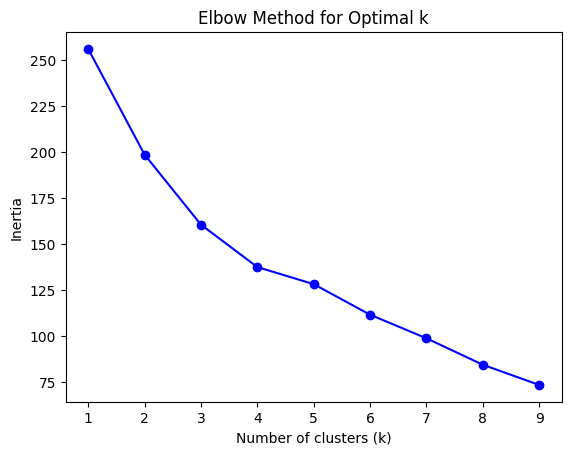

In [175]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [185]:
k = 2  # example, choose from elbow
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
pivot_percent['cluster'] = kmeans.fit_predict(X_scaled)

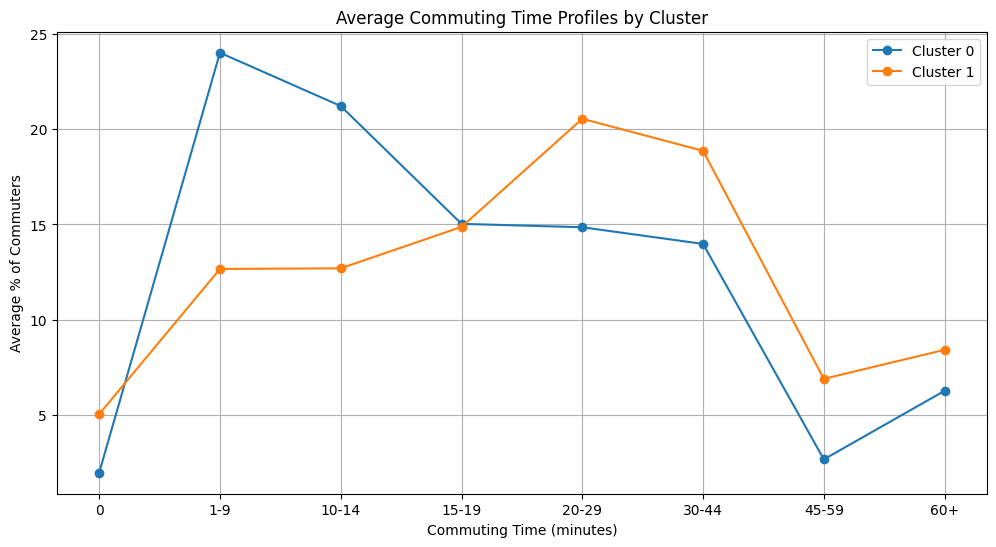

In [186]:
cluster_means = pivot_percent.groupby('cluster').mean()

plt.figure(figsize=(12,6))
for cluster_id, row in cluster_means.iterrows():
    plt.plot(row.index, row.values, marker='o', label=f'Cluster {cluster_id}')

plt.title('Average Commuting Time Profiles by Cluster')
plt.xlabel('Commuting Time (minutes)')
plt.ylabel('Average % of Commuters')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f'in 2019, there were {EU_commuters/1000} million commuters across EU')

in 2019, there were 909.7865 million commuters across EU


In [187]:
country_clusters = pivot_percent['cluster'].reset_index()
country_clusters.columns = ['Region', 'cluster']
country_clusters = country_clusters.sort_values('cluster').reset_index(drop=True)

country_clusters.head(30)

,Region,cluster
0,Italy,0
1,Spain,0
2,Portugal,0
3,Greece,0
4,Iceland,0
5,Switzerland,1
6,Sweden,1
7,Slovenia,1
8,Slovakia,1
9,Romania,1


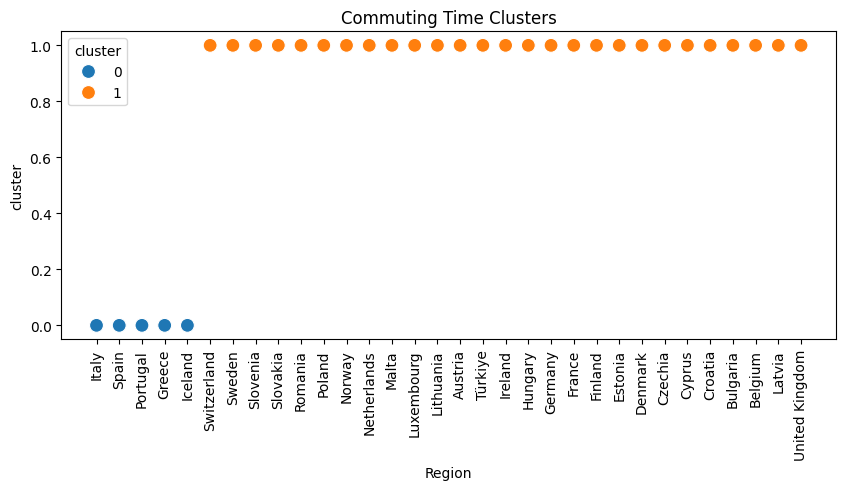

In [188]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=country_clusters, x='Region', y='cluster', hue='cluster', s=100)
plt.xticks(rotation=90)
plt.title('Commuting Time Clusters')
plt.show()